<a href="https://colab.research.google.com/github/smartechie-repo/ARIMA-model-sales-prediction/blob/main/sales_prediction_arima_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


********
# SALES PREDICTION using  ARIMA Model
#### Time Series Analysis
*********


#### Essential Imports

In [66]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import axis
from IPython.display import Markdown, display, HTML, display_html


# Change color of Matplotlib font
import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)

# Utility function to export the figure to PDF
def export2pdf(fig, out_fname):
  from matplotlib.backends.backend_pdf import PdfPages
  pp = PdfPages(out_fname)
  pp.savefig(fig)
  pp.close()


def save_df_as_fig(df, path):
    from pandas.plotting import table

    fig, ax = plt.subplots(figsize=(15, 5)) # set image frame size
    ax.xaxis.set_visible(False)  # x axis hidden
    ax.yaxis.set_visible(False)  # y axis hidden
    ax.set_frame_on(False)  # Frame hidden
    tabla = table(ax, df, loc='upper right', colWidths=[0.17]*len(df.columns))
    tabla.auto_set_font_size(False) # Activate set fontsize manually
    tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
    tabla.scale(1.2, 1.2) # Adjust table size
    plt.savefig(path, transparent=True)

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))



#### Data Load

In [67]:
# Mount the google drive
# from google.colab import drive
# drive.mount('/content/drive')
# data_file_url=pd.read_csv('/content/drive/SaaS/SaaS_sales_data.csv')

In [68]:
# Load from github

# To load a CSV file from GitHub, we need to provide pandas with a URL to the raw CSV file.
# The cleaned data CSV file given in the assessment is uploaded to github, and loaded back without any formatting or styling.
data_file_url = 'https://raw.githubusercontent.com/smartechie-repo/ARIMA-model-sales-prediction/main/SaaS/SaaS_sales_data.csv'

raw_order_sales_df = pd.read_csv(data_file_url)
# Check data types and number of values, as well as overall size of dataframe
raw_order_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69034 entries, 0 to 69033
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SALE_DATE    69034 non-null  object 
 1   CATEGORY     69034 non-null  object 
 2   SUBCATEGORY  69034 non-null  object 
 3   SALES        69034 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [69]:
display(raw_order_sales_df)

,SALE_DATE,CATEGORY,SUBCATEGORY,SALES
0,1995-01-01,PRO EDITION,PRO ADMIN,14.545671
1,1995-01-01,PRO EDITION,PRO DEVELOPER,24.242786
2,1995-01-01,PRO EDITION,PRO CONSUMER,9.697114
3,1995-01-01,ENTERPRISE,ENTERPRISE ADMIN,15.210962
4,1995-01-01,ENTERPRISE,ENTERPRISE DEVELOPER,20.281283
...,...,...,...,...
69029,2021-12-31,PRO EDITION,PRO CONSUMER,12.863207
69030,2021-12-31,ENTERPRISE,ENTERPRISE ADMIN,24.990177
69031,2021-12-31,ENTERPRISE,ENTERPRISE DEVELOPER,33.320236
69032,2021-12-31,ENTERPRISE,ENTERPRISE COLLABORATOR,16.660118


#### Feature Selection  ( ***Take what you want to eat*** ) 😀

In [80]:
saas_sales_df = raw_order_sales_df[['SALE_DATE', 'CATEGORY', 'SALES']]


In [81]:
saas_sales_df.shape


(69034, 3)

In [82]:
saas_sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69034 entries, 0 to 69033
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SALE_DATE  69034 non-null  object 
 1   CATEGORY   69034 non-null  object 
 2   SALES      69034 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [83]:
display(saas_sales_df)

,SALE_DATE,CATEGORY,SALES
0,1995-01-01,PRO EDITION,14.545671
1,1995-01-01,PRO EDITION,24.242786
2,1995-01-01,PRO EDITION,9.697114
3,1995-01-01,ENTERPRISE,15.210962
4,1995-01-01,ENTERPRISE,20.281283
...,...,...,...
69029,2021-12-31,PRO EDITION,12.863207
69030,2021-12-31,ENTERPRISE,24.990177
69031,2021-12-31,ENTERPRISE,33.320236
69032,2021-12-31,ENTERPRISE,16.660118


In [84]:
saas_sales_df.isna().sum()

SALE_DATE    0
CATEGORY     0
SALES        0
dtype: int64

In [85]:
saas_sales_df.isnull().sum()

SALE_DATE    0
CATEGORY     0
SALES        0
dtype: int64

#### Data Transformation

In [89]:
saas_sales_df['SALE_DATE'] = pd.to_datetime(saas_sales_df['SALE_DATE']).dt.strftime('%Y-%m-%d')
display(saas_sales_df)
saas_sales_df.info()

,SALE_DATE,CATEGORY,SALES,SALE_MONTH
0,1995-01-01,PRO EDITION,14.545671,1995-01
1,1995-01-01,PRO EDITION,24.242786,1995-01
2,1995-01-01,PRO EDITION,9.697114,1995-01
3,1995-01-01,ENTERPRISE,15.210962,1995-01
4,1995-01-01,ENTERPRISE,20.281283,1995-01
...,...,...,...,...
69029,2021-12-31,PRO EDITION,12.863207,2021-12
69030,2021-12-31,ENTERPRISE,24.990177,2021-12
69031,2021-12-31,ENTERPRISE,33.320236,2021-12
69032,2021-12-31,ENTERPRISE,16.660118,2021-12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69034 entries, 0 to 69033
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SALE_DATE   69034 non-null  object 
 1   CATEGORY    69034 non-null  object 
 2   SALES       69034 non-null  float64
 3   SALE_MONTH  69034 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [90]:
# Eliminate the day part from the date
saas_sales_df['SALE_MONTH'] = pd.to_datetime(saas_sales_df['SALE_DATE']).dt.strftime('%Y-%m')
display(saas_sales_df)

,SALE_DATE,CATEGORY,SALES,SALE_MONTH
0,1995-01-01,PRO EDITION,14.545671,1995-01
1,1995-01-01,PRO EDITION,24.242786,1995-01
2,1995-01-01,PRO EDITION,9.697114,1995-01
3,1995-01-01,ENTERPRISE,15.210962,1995-01
4,1995-01-01,ENTERPRISE,20.281283,1995-01
...,...,...,...,...
69029,2021-12-31,PRO EDITION,12.863207,2021-12
69030,2021-12-31,ENTERPRISE,24.990177,2021-12
69031,2021-12-31,ENTERPRISE,33.320236,2021-12
69032,2021-12-31,ENTERPRISE,16.660118,2021-12


In [91]:
# Calculate the monthly sales by category
monthly_saas_sales_df = saas_sales_df.copy()
monthly_saas_sales_df = monthly_saas_sales_df \
  .groupby(['SALE_MONTH', 'CATEGORY'], as_index=False)['SALES'].sum()

display(monthly_saas_sales_df)

,SALE_MONTH,CATEGORY,SALES
0,1995-01,ENTERPRISE,1509.00
1,1995-01,PRO EDITION,1443.00
2,1995-02,ENTERPRISE,1541.00
3,1995-02,PRO EDITION,1401.00
4,1995-03,ENTERPRISE,1597.00
...,...,...,...
643,2021-10,PRO EDITION,4535.75
644,2021-11,ENTERPRISE,5130.00
645,2021-11,PRO EDITION,4659.00
646,2021-12,ENTERPRISE,6370.00


In [92]:
# Sort the dataset by month & category
monthly_order_sales_df_cp = monthly_saas_sales_df.copy()
monthly_order_sales_df_sorted = monthly_order_sales_df_cp.sort_values(['SALE_MONTH', 'CATEGORY'])
display(monthly_order_sales_df_sorted)

,SALE_MONTH,CATEGORY,SALES
0,1995-01,ENTERPRISE,1509.00
1,1995-01,PRO EDITION,1443.00
2,1995-02,ENTERPRISE,1541.00
3,1995-02,PRO EDITION,1401.00
4,1995-03,ENTERPRISE,1597.00
...,...,...,...
643,2021-10,PRO EDITION,4535.75
644,2021-11,ENTERPRISE,5130.00
645,2021-11,PRO EDITION,4659.00
646,2021-12,ENTERPRISE,6370.00


#### Save the cleaned & prepared dataset into csv


In [101]:
monthly_saas_sales_df.to_csv('prepared_saas_sales_data.csv', index=False)

## ARIMA Model Building

#### Essential packages

In [102]:
prepared_sales_data_df = pd.read_csv('prepared_saas_sales_data.csv')
display(prepared_sales_data_df)

,SALE_MONTH,CATEGORY,SALES
0,1995-01,ENTERPRISE,1509.00
1,1995-01,PRO EDITION,1443.00
2,1995-02,ENTERPRISE,1541.00
3,1995-02,PRO EDITION,1401.00
4,1995-03,ENTERPRISE,1597.00
...,...,...,...
643,2021-10,PRO EDITION,4535.75
644,2021-11,ENTERPRISE,5130.00
645,2021-11,PRO EDITION,4659.00
646,2021-12,ENTERPRISE,6370.00


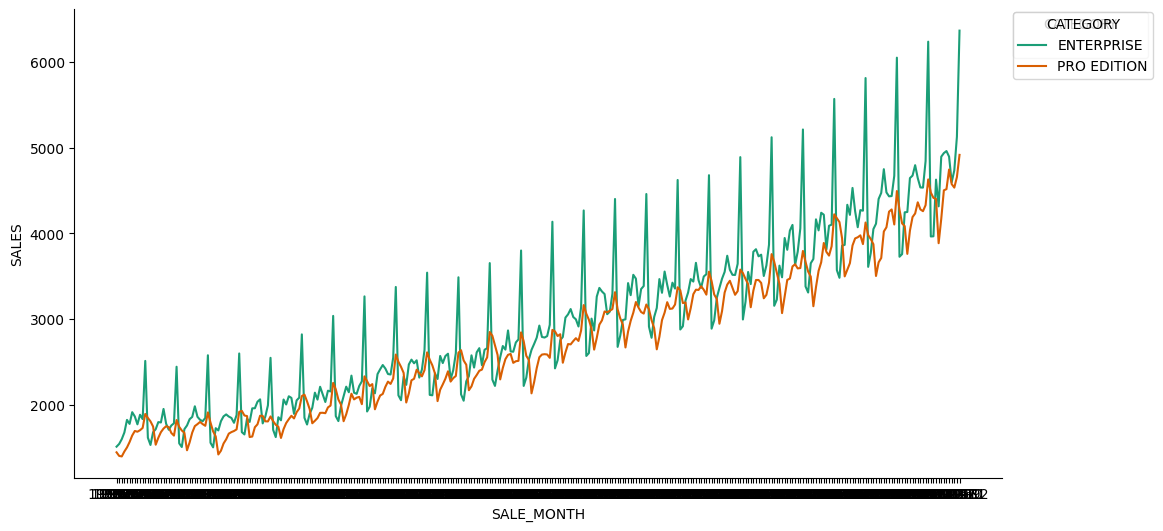

In [103]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SALE_MONTH']
  ys = series['SALES']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = prepared_sales_data_df.sort_values('SALE_MONTH', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CATEGORY')):
  _plot_series(series, series_name, i)
  fig.legend(title='CATEGORY', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SALE_MONTH')
_ = plt.ylabel('SALES')

In [104]:
# Lets only consider the category 'Technology' from the full data set
df_sales_engg = prepared_sales_data_df.copy()
df_sales_engg = df_sales_engg[df_sales_engg["CATEGORY"] == "ENTERPRISE"].reset_index(drop=True)

In [105]:
df_sales_engg["SALE_MONTH"] = pd.to_datetime(df_sales_engg["SALE_MONTH"]).dt.tz_localize('UTC')

In [106]:
df_sales_engg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SALE_MONTH  324 non-null    datetime64[ns, UTC]
 1   CATEGORY    324 non-null    object             
 2   SALES       324 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 7.7+ KB


In [107]:
display(df_sales_engg)

,SALE_MONTH,CATEGORY,SALES
0,1995-01-01 00:00:00+00:00,ENTERPRISE,1509.0
1,1995-02-01 00:00:00+00:00,ENTERPRISE,1541.0
2,1995-03-01 00:00:00+00:00,ENTERPRISE,1597.0
3,1995-04-01 00:00:00+00:00,ENTERPRISE,1675.0
4,1995-05-01 00:00:00+00:00,ENTERPRISE,1822.0
...,...,...,...
319,2021-08-01 00:00:00+00:00,ENTERPRISE,4898.0
320,2021-09-01 00:00:00+00:00,ENTERPRISE,4598.0
321,2021-10-01 00:00:00+00:00,ENTERPRISE,4737.0
322,2021-11-01 00:00:00+00:00,ENTERPRISE,5130.0


###### Prepare Training & Test data set

We will split our data into training  and test, based on a predictive horizon of 12 months. Meaning, last 12 months data will be considered as TEST data & all other prior dated data will be considered as TRAINING data.

In [108]:
pred_periods = 12 # Last 1 year data will be used for testing the prediction
split_limit = df_sales_engg['SALE_MONTH'].count() - pred_periods # corresponds to a prediction horizon of 1 years
df_sales_train  = pd.DataFrame(df_sales_engg[:split_limit]).rename(columns={'SALES':'y_train'})
df_sales_test = pd.DataFrame(df_sales_engg[split_limit:]).rename(columns={'SALES':'y_test' })

print("df_sales_train.info: \n", df_sales_train.info())
display(df_sales_train)
print("*"*50)
print("df_sales_test.info: \n", df_sales_test.info())
display(df_sales_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SALE_MONTH  312 non-null    datetime64[ns, UTC]
 1   CATEGORY    312 non-null    object             
 2   y_train     312 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 7.4+ KB
df_sales_train.info: 
 None


,SALE_MONTH,CATEGORY,y_train
0,1995-01-01 00:00:00+00:00,ENTERPRISE,1509.0
1,1995-02-01 00:00:00+00:00,ENTERPRISE,1541.0
2,1995-03-01 00:00:00+00:00,ENTERPRISE,1597.0
3,1995-04-01 00:00:00+00:00,ENTERPRISE,1675.0
4,1995-05-01 00:00:00+00:00,ENTERPRISE,1822.0
...,...,...,...
307,2020-08-01 00:00:00+00:00,ENTERPRISE,4647.0
308,2020-09-01 00:00:00+00:00,ENTERPRISE,4538.0
309,2020-10-01 00:00:00+00:00,ENTERPRISE,4536.0
310,2020-11-01 00:00:00+00:00,ENTERPRISE,4846.0


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 312 to 323
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SALE_MONTH  12 non-null     datetime64[ns, UTC]
 1   CATEGORY    12 non-null     object             
 2   y_test      12 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 420.0+ bytes
df_sales_test.info: 
 None


,SALE_MONTH,CATEGORY,y_test
312,2021-01-01 00:00:00+00:00,ENTERPRISE,3965.0
313,2021-02-01 00:00:00+00:00,ENTERPRISE,3967.0
314,2021-03-01 00:00:00+00:00,ENTERPRISE,4629.0
315,2021-04-01 00:00:00+00:00,ENTERPRISE,4317.0
316,2021-05-01 00:00:00+00:00,ENTERPRISE,4897.0
317,2021-06-01 00:00:00+00:00,ENTERPRISE,4939.0
318,2021-07-01 00:00:00+00:00,ENTERPRISE,4963.0
319,2021-08-01 00:00:00+00:00,ENTERPRISE,4898.0
320,2021-09-01 00:00:00+00:00,ENTERPRISE,4598.0
321,2021-10-01 00:00:00+00:00,ENTERPRISE,4737.0


#### Now lets Create the Auto Arima model

###### How to Choose ARIMA Model parameters?

For simplicity, we can use auto arima which will automatically find the most optimal parameters for the ARIMA model.

> [Auto-ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html): Automatic Model Selection for Time Series Forecasting
- `Purpose`: Auto-ARIMA is a method to automatically find the best ARIMA model for a given time series data set.
- `Process`:
  - `Differencing`:
    - It performs tests like KPSS or ADF to determine the necessary differencing order (d) to achieve stationary data.
  - `Model Fitting`:
      - It fits ARIMA models within user-defined ranges for
          - autoregressive (p) and
          - moving average (q) parameters, and for
          - seasonal parameters (P, Q, D) if applicable.
  - `Model Selection`:
      - It searches for the model with the lowest information criterion (AIC, BIC, etc.), indicating the best fit based on complexity and accuracy.
  - `Limitations`:
      - May not find a suitable model if the data is `not stationary`.
      - Can be slow for seasonal data due to the `non-stepwise search` approach.

Key Points:

- Auto-ARIMA simplifies the often complex process of selecting the best ARIMA model parameters.
- It automates differencing, model fitting, and selection based on information criteria.
- While convenient, it's crucial to address stationarity issues before using auto-ARIMA and consider alternative approaches for complex scenarios.


In [109]:
!pip install pmdarima

In [130]:
from pmdarima.arima import auto_arima
auto_arima_model_fit = auto_arima(
    df_sales_train.y_train, test='adf',
    max_p=3, max_d=3, max_q=3,
    seasonal=True, m=12,
    max_P=3, max_D=2, max_Q=3,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
# auto_arima_model_fit = auto_arima(
#     df_sales_train.y_train, m=12,
#     trace=True, error_action='ignore',
#     suppress_warnings=True
# )



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=7.39 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3609.125, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3572.110, Time=1.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3586.362, Time=1.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3852.463, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3570.655, Time=0.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=3571.969, Time=0.90 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3573.689, Time=3.81 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=3531.765, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3533.735, Time=0.73 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=3533.721, Time=0.55 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=3527.754, Time=5.34 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=3513.146, Time=7.01 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3525.712, Time=5.06 sec
 ARIMA(2,0,0)(3,1,1)[12]

###### Summarize the model

In [113]:
print(auto_arima_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  312
Model:             SARIMAX(3, 0, 0)x(3, 1, [1], 12)   Log Likelihood               -1728.511
Date:                              Fri, 08 Mar 2024   AIC                           3475.021
Time:                                      00:44:02   BIC                           3508.355
Sample:                                           0   HQIC                          3488.362
                                              - 312                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.2345     12.573      2.325      0.020       4.591      53.878
ar.L1          0.19

In [124]:
# Create the predictions
# The parameter dynamic=False means that the model makes predictions upon the lagged values.
# This means that the model is trained until a point in the time-series and then tries to predict the next value.
pred_train = auto_arima_model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_sales_train['y_train_pred'] = pd.to_numeric(pred_train)

# # Calculate the percentage difference
# df_sales_train['diff_percent'] = abs((df_sales_train['y_train'] - df_sales_train['y_train_pred']) / df_sales_train['y_train'])* 100

# display(df_sales_train)
# display(df_sales_train[(df_sales_train['diff_percent'] > 10)])

#### Now Lets Verify the prediction model and cross check with test data

In [125]:

sales_test_pred = auto_arima_model_fit.predict(n_periods=pred_periods, dynamic=False)
df_sales_test['y_test_pred'] = pd.to_numeric(sales_test_pred)
# Calculate the percentage difference
# df_sales_test['diff_percent'] = abs((df_sales_test['y_test'] - sales_test_pred) / df_sales_test['y_test'])* 100

display(df_sales_test)

,SALE_MONTH,CATEGORY,y_test,y_test_pred,diff_percent
312,2021-01-01 00:00:00+00:00,ENTERPRISE,3965.0,3914.795003,1.266204
313,2021-02-01 00:00:00+00:00,ENTERPRISE,3967.0,3958.920254,0.203674
314,2021-03-01 00:00:00+00:00,ENTERPRISE,4629.0,4416.240837,4.596223
315,2021-04-01 00:00:00+00:00,ENTERPRISE,4317.0,4393.267860,1.766687
316,2021-05-01 00:00:00+00:00,ENTERPRISE,4897.0,4798.171933,2.018135
317,2021-06-01 00:00:00+00:00,ENTERPRISE,4939.0,4791.720210,2.981976
318,2021-07-01 00:00:00+00:00,ENTERPRISE,4963.0,4911.996029,1.027684
319,2021-08-01 00:00:00+00:00,ENTERPRISE,4898.0,4799.034120,2.020537
320,2021-09-01 00:00:00+00:00,ENTERPRISE,4598.0,4615.683840,0.384599
321,2021-10-01 00:00:00+00:00,ENTERPRISE,4737.0,4656.754681,1.694011


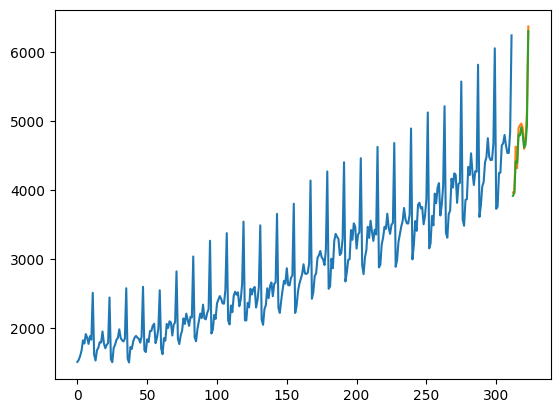

In [126]:
#plot the predictions for validation set
plt.plot(df_sales_train.y_train, label='Train')
plt.plot(df_sales_test.y_test, label='Test')
plt.plot(df_sales_test.y_test_pred, label='Prediction')
plt.show()

#### Model Validation (calculate rmse)

In [127]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(df_sales_test.y_test, df_sales_test.y_test_pred))
print(rms)


112.5290949173368


## Combine test and train prediction values with original Dataset

In [129]:
df_sales_train.info()
df_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   SALE_MONTH    312 non-null    datetime64[ns, UTC]
 1   CATEGORY      312 non-null    object             
 2   y_train       312 non-null    float64            
 3   y_train_pred  312 non-null    float64            
 4   diff_percent  312 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(1)
memory usage: 12.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 312 to 323
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   SALE_MONTH    12 non-null     datetime64[ns, UTC]
 1   CATEGORY      12 non-null     object             
 2   y_test        12 non-null     float64            
 3   y_test_pred   12 non-null     float64            

In [136]:
predicted_saas_sales_df = pd.concat([df_sales_train, df_sales_test], axis = 1) \
  .rename(columns={'y_train':'SALES', 'y_test': 'SALES',
          'y_train_pred':'PREDICTION', 'y_test_pred': 'PREDICTION'}) \
  [["SALE_MONTH", "CATEGORY", "SALES", "PREDICTION"]]

display(predicted_saas_sales_df)

,SALE_MONTH,SALE_MONTH,CATEGORY,CATEGORY,SALES,SALES,PREDICTION,PREDICTION
0,1995-01-01 00:00:00+00:00,NaT,ENTERPRISE,NaN,1509.0,NaN,112.459348,NaN
1,1995-02-01 00:00:00+00:00,NaT,ENTERPRISE,NaN,1541.0,NaN,119.354287,NaN
2,1995-03-01 00:00:00+00:00,NaT,ENTERPRISE,NaN,1597.0,NaN,126.761605,NaN
3,1995-04-01 00:00:00+00:00,NaT,ENTERPRISE,NaN,1675.0,NaN,134.872264,NaN
4,1995-05-01 00:00:00+00:00,NaT,ENTERPRISE,NaN,1822.0,NaN,140.977619,NaN
...,...,...,...,...,...,...,...,...
319,NaT,2021-08-01 00:00:00+00:00,NaN,ENTERPRISE,NaN,4898.0,NaN,4799.034120
320,NaT,2021-09-01 00:00:00+00:00,NaN,ENTERPRISE,NaN,4598.0,NaN,4615.683840
321,NaT,2021-10-01 00:00:00+00:00,NaN,ENTERPRISE,NaN,4737.0,NaN,4656.754681
322,NaT,2021-11-01 00:00:00+00:00,NaN,ENTERPRISE,NaN,5130.0,NaN,4922.223018


#### Save Predicted Data to a csv file

In [137]:
predicted_saas_sales_df.to_csv('predicted_saas_sales_data.csv', index=False)

#### Result Review and Exploration

###### Sample Prediction (Sample data from Training set ) and Error Analysis

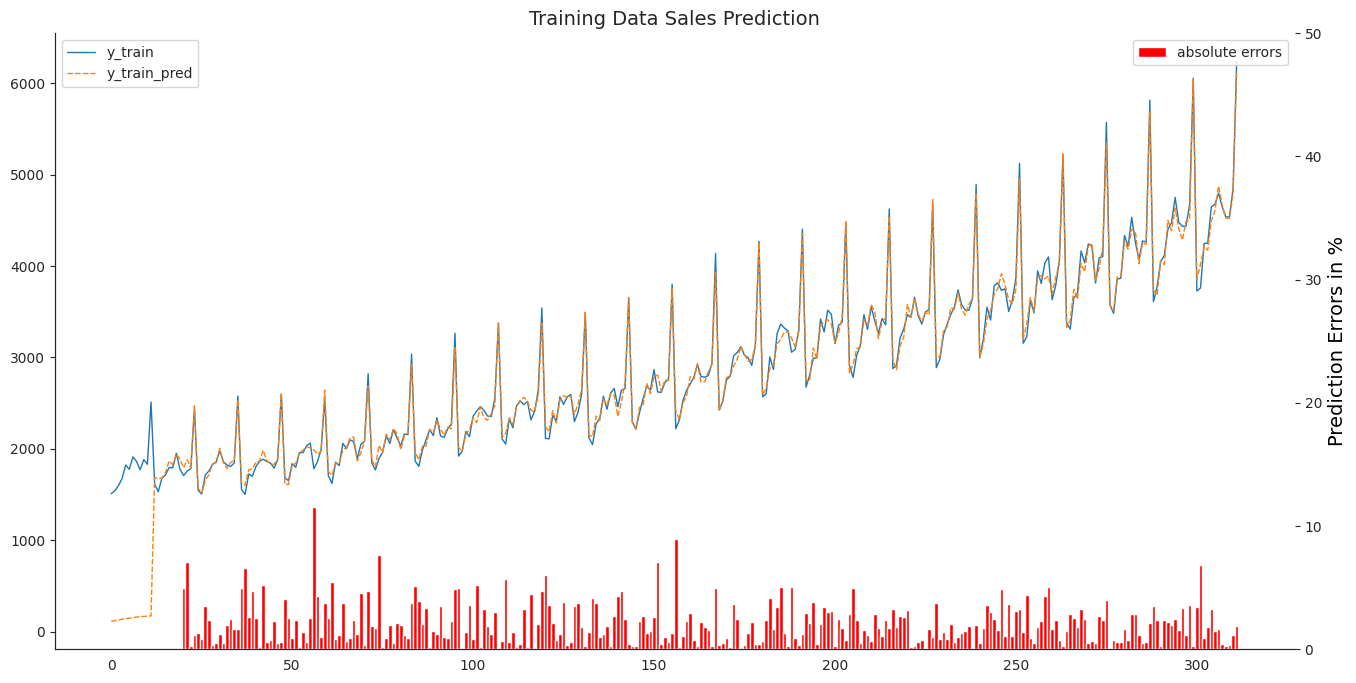

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Training Data Sales Prediction", fontsize=14)
sns.lineplot(data=df_sales_train[['y_train', 'y_train_pred']], linewidth=1.0)

# Print percentage prediction errors on a separate axis (ax2)
ax2 = ax1.twinx()
ax2.set_ylabel('Prediction Errors in %', color='black', fontsize=14)
ax2.set_ylim([0,50])
ax2.bar(height=df_sales_train['diff_percent'][20:], x=df_sales_train.index[20:],
        width=1, color='red', label='absolute errors')

plt.legend(['Error %'], loc='upper right')
plt.legend()
plt.show()

###### Test Prediction Analysis & Comparision

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   SALE_MONTH    324 non-null    datetime64[ns, UTC]
 1   CATEGORY      324 non-null    object             
 2   y_train       312 non-null    float64            
 3   y_train_pred  312 non-null    float64            
 4   diff_percent  324 non-null    float64            
 5   y_test_pred   12 non-null     float64            
 6   y_test        12 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 17.8+ KB


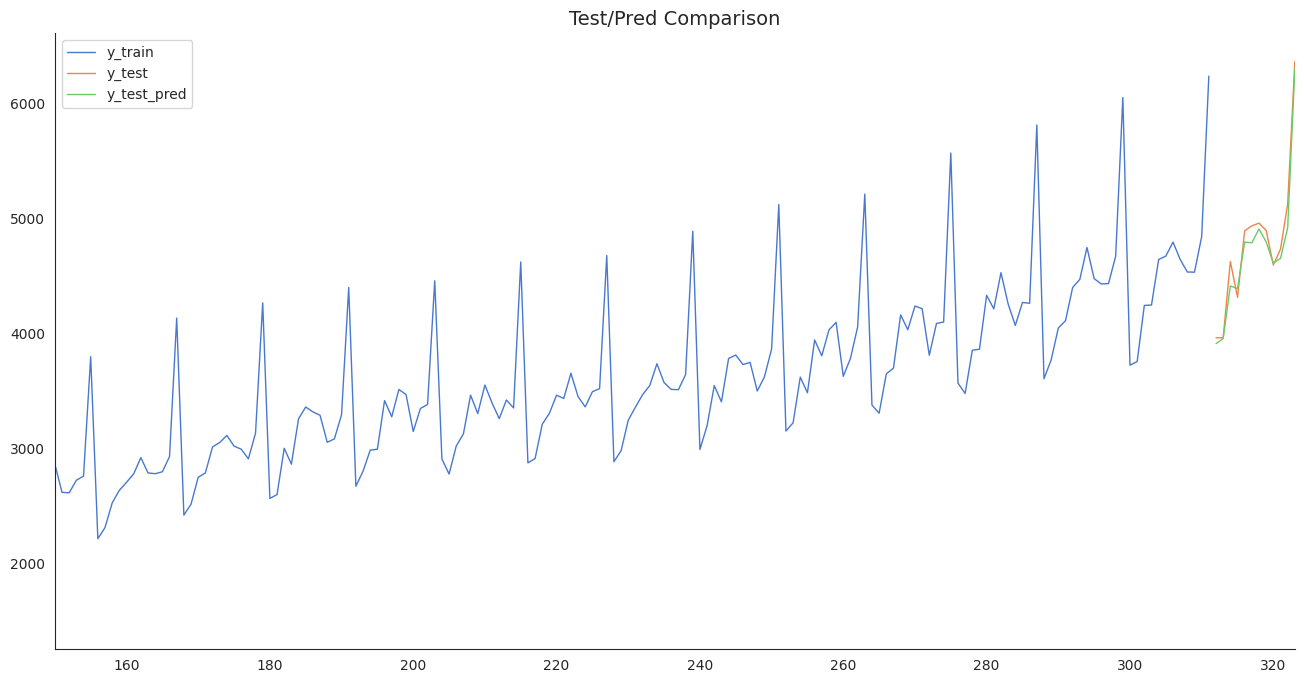

In [160]:
import numpy as np
df_saas_sales.info()
# Generate prediction for n periods,
# Predictions start from the last date of the training data
test_pred = auto_arima_model_fit.predict(n_periods=pred_periods, dynamic=False)
df_sales_train['y_test_pred'] = test_pred
df_saas_sales = pd.concat([df_sales_train, df_sales_test])

# Print the predicted time-series
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("Test/Pred Comparison", fontsize=14)
sns.despine();
sns.lineplot(data=df_saas_sales[['y_train', 'y_test', 'y_test_pred']], linewidth=1.0,
             dashes=False, palette='muted')
# removed y_train_predict from the above to keep the visual more clear
ax.set_xlim([df_saas_sales.index[150],df_saas_sales.index.max()])
# ax.set_xlabel(df_saas_sales['SALE_MONTH'])
plt.legend()
plt.show()